In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import matplotlib
pd.set_option('display.float_format', '{:.0f}'.format)


In [2]:
df = pd.read_csv("USA Housing Dataset.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000,3,2,1340,1384,3,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000,4,3,3540,159430,2,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888,5,6,7270,130017,2,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000,3,2,998,904,2,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900,5,3,3060,7015,1,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


### Data Cleaning: Initial Steps

At the start, we can identify certain columns that are unnecessary for our analysis and can be removed. These include:

- `Date`
- `State Zip`
- `Country`
- `year renovated`
- `view`
- `waterfront`
- `street`
-  `Basement`
- `sqft above`
- `sqft lot`
- `year built`

By dropping these columns, we can streamline the dataset for better processing and analysis.


In [3]:
df = df.drop(["date","yr_renovated","statezip","country","yr_built","waterfront","view","street","sqft_basement","sqft_above","sqft_lot"],axis=1)
df

,price,bedrooms,bathrooms,sqft_living,floors,condition,city
0,376000,3,2,1340,3,3,Seattle
1,800000,4,3,3540,2,3,Carnation
2,2238888,5,6,7270,2,3,Issaquah
3,324000,3,2,998,2,3,Seattle
4,549900,5,3,3060,1,5,Seattle
...,...,...,...,...,...,...,...
4135,308167,3,2,1510,1,4,Seattle
4136,534333,3,2,1460,2,3,Bellevue
4137,416904,3,2,3010,2,3,Renton
4138,203400,4,2,2090,1,3,Seattle


In [4]:
len(df['city'].unique())

43

In [5]:
df["condition"].unique()

array([3, 5, 4, 2, 1], dtype=int64)

In [6]:
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
floors         0
condition      0
city           0
dtype: int64

#### It seems I was lucky in picking a dataset that didn't have any null values.


In [7]:
locations_stats = df.groupby("city")["city"].agg('count').sort_values(ascending = False)
locations_stats

city
Seattle               1415
Renton                 261
Bellevue               260
Redmond                209
Kent                   167
Kirkland               166
Issaquah               162
Auburn                 162
Sammamish              158
Federal Way            131
Shoreline              112
Woodinville            103
Maple Valley            90
Mercer Island           81
Snoqualmie              65
Burien                  64
Kenmore                 58
Des Moines              52
North Bend              45
Duvall                  39
Covington               39
Lake Forest Park        33
Newcastle               31
Bothell                 30
SeaTac                  29
Vashon                  28
Tukwila                 28
Enumclaw                28
Carnation               18
Normandy Park           16
Medina                  11
Clyde Hill              10
Fall City                9
Black Diamond            7
Pacific                  6
Yarrow Point             4
Ravensdale             

##### To simplify our dataset, I'll remove the cities with fewer than 30 data points.

In [8]:
locations_less_than_30 = locations_stats[locations_stats<=30]
locations_less_than_30

city
Bothell               30
SeaTac                29
Vashon                28
Tukwila               28
Enumclaw              28
Carnation             18
Normandy Park         16
Medina                11
Clyde Hill            10
Fall City              9
Black Diamond          7
Pacific                6
Yarrow Point           4
Ravensdale             4
Skykomish              2
Preston                2
Milton                 2
Snoqualmie Pass        1
Beaux Arts Village     1
Algona                 1
Name: city, dtype: int64

In [9]:
df.city = df["city"].apply(lambda x : 'other' if x in locations_less_than_30 else x)


In [10]:
df.groupby("city")["city"].agg('count').sort_values(ascending = False)


city
Seattle             1415
Renton               261
Bellevue             260
other                237
Redmond              209
Kent                 167
Kirkland             166
Auburn               162
Issaquah             162
Sammamish            158
Federal Way          131
Shoreline            112
Woodinville          103
Maple Valley          90
Mercer Island         81
Snoqualmie            65
Burien                64
Kenmore               58
Des Moines            52
North Bend            45
Duvall                39
Covington             39
Lake Forest Park      33
Newcastle             31
Name: city, dtype: int64

In [11]:
df["price_per_sqft"] = df["price"] / df["sqft_living"]


In [12]:
df

,price,bedrooms,bathrooms,sqft_living,floors,condition,city,price_per_sqft
0,376000,3,2,1340,3,3,Seattle,281
1,800000,4,3,3540,2,3,other,226
2,2238888,5,6,7270,2,3,Issaquah,308
3,324000,3,2,998,2,3,Seattle,325
4,549900,5,3,3060,1,5,Seattle,180
...,...,...,...,...,...,...,...,...
4135,308167,3,2,1510,1,4,Seattle,204
4136,534333,3,2,1460,2,3,Bellevue,366
4137,416904,3,2,3010,2,3,Renton,139
4138,203400,4,2,2090,1,3,Seattle,97


In [13]:
df["price_per_sqft"].describe()

count    4140
mean      266
std       375
min         0
25%       180
50%       244
75%       315
max     22534
Name: price_per_sqft, dtype: float64

In [14]:
df = df[df["price"] !=0]

#### our data sets has outliers that can cause problems later in our AI model we should remove them

In [15]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('city'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        # Allow a broader range: within 2 standard deviations
        reduced_df = subdf[(subdf.price_per_sqft > (m - 2 * st)) & (subdf.price_per_sqft <= (m + 2 * st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df_f = remove_pps_outliers(df)
df_f["price_per_sqft"].describe()


count   3958
mean     257
std       99
min       10
25%      182
50%      243
75%      313
max      697
Name: price_per_sqft, dtype: float64

In [16]:
df_f.bathrooms.unique()

array([2.  , 1.5 , 1.  , 2.5 , 1.75, 2.25, 5.25, 2.75, 3.  , 3.5 , 3.25,
       4.25, 3.75, 4.  , 5.5 , 4.5 , 5.  , 0.75, 6.5 , 6.75, 4.75, 0.  ,
       6.25, 1.25])

In [17]:
df_f.bedrooms.unique()


array([3., 4., 6., 2., 5., 7., 1., 0., 8.])

we can see that bathroom numbers have decimal which isn't possible so let's round them to integers
 

In [18]:
df_f["bathrooms"] = df.bathrooms.apply(lambda x: round(x))
df_f["bathrooms"] = df.bathrooms.apply(lambda x: int(x))

In [19]:
df_f.dropna(axis=0,inplace=True)

In [20]:
df_f.bathrooms.isnull().sum()

0

In [21]:
to_drop = df_f[df_f["bathrooms"]<1].index
df_f.drop(to_drop,inplace=True)

Text(0, 0.5, 'count')

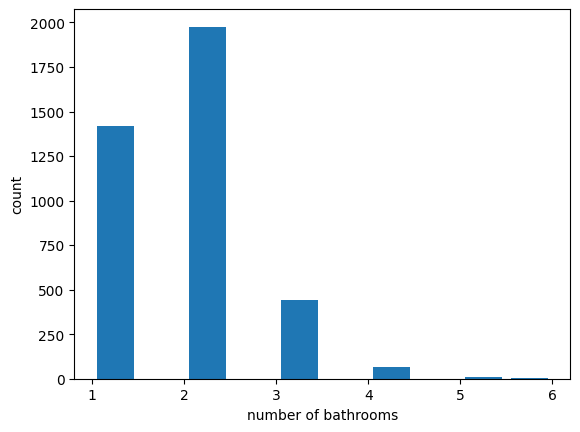

In [22]:
plt.hist(df_f.bathrooms,rwidth=0.8)
plt.xlabel("number of bathrooms")
plt.ylabel("count")

we can't have a a house with more bathrooms than bedrooms let's see if we have any

In [23]:
df_f[df_f["bathrooms"]>df_f["bedrooms"]+2]

,price,bedrooms,bathrooms,sqft_living,floors,condition,city,price_per_sqft
2,239950,3,6,1900,2,4,Auburn,126
749,305000,2,5,1140,2,3,Issaquah,268
2194,342000,3,6,1260,1,3,Seattle,271


In [24]:
df_f = df_f[df_f["bathrooms"]<df_f["bedrooms"]+2]

In [25]:
df_f.drop(['price_per_sqft'], axis='columns',inplace = True)

We use `get_dummies()` to convert categorical variables into a format that can be used in machine learning models by creating binary (0/1) columns for each category.

In [26]:
dummies = pd.get_dummies(df_f.city,dtype=int)
dummies

,Auburn,Bellevue,Burien,Covington,Des Moines,Duvall,Federal Way,Issaquah,Kenmore,Kent,...,Newcastle,North Bend,Redmond,Renton,Sammamish,Seattle,Shoreline,Snoqualmie,Woodinville,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3950,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Now, we will add the dummy columns to the main DataFrame, but it's important to drop one of the dummy columns. This is because the values in the remaining columns can represent the dropped column using all 0s, avoiding redundancy. and we can also drop the city column since we added the dummy columns that represent it

In [27]:
df = pd.concat([df_f.drop("city",axis="columns"),dummies.drop("other",axis="columns")],axis="columns")
df

,price,bedrooms,bathrooms,sqft_living,floors,condition,Auburn,Bellevue,Burien,Covington,...,Mercer Island,Newcastle,North Bend,Redmond,Renton,Sammamish,Seattle,Shoreline,Snoqualmie,Woodinville
0,560000,3,2,2560,1,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,185000,3,3,1370,1,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,287600,3,2,1950,2,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,225000,3,2,1660,1,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,257200,3,2,1850,1,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3950,188000,4,2,3260,1,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3954,425000,3,2,1870,2,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3955,280000,3,2,3910,2,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3956,171758,3,3,1000,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now that we’ve finished data cleaning, let's start developing our model. We'll begin by splitting the DataFrame into the dependent and independent variables: the independent variables represent the factors that affect the price, while the dependent variable represents the price itself

In [28]:
X = df.drop("price",axis="columns")
y = df.price

Now, let's split the dataset into training and testing sets. We’ll use 80% of the data for training the model and 20% for testing it. This allows us to train the model on one portion of the data and evaluate its performance on another, unseen portion to check for overfitting.

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [30]:
from sklearn.linear_model import LinearRegression
Lr_clf = LinearRegression()
Lr_clf.fit(X_train,y_train)
Lr_clf.score(X_test,y_test)

0.7153950559072211

In [31]:
from sklearn.model_selection import  ShuffleSplit
from sklearn.model_selection import  cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),X, y, cv = cv )

array([0.71011609, 0.71589377, 0.71862758, 0.7266557 , 0.72348062])

We are getting an average accuracy of 70% with the Linear Regression model, so now we will test other models to determine which one provides a more accurate fit for our data

In [32]:
from sklearn.model_selection import  ShuffleSplit
from sklearn.model_selection import  cross_val_score
from sklearn.linear_model import Lasso

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(Lasso(),X, y, cv = cv )

array([0.71011705, 0.7158918 , 0.718626  , 0.72665803, 0.72347871])

In [33]:
from sklearn.model_selection import  ShuffleSplit
from sklearn.model_selection import  cross_val_score
from sklearn.tree import DecisionTreeRegressor


cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(DecisionTreeRegressor(),X, y, cv = cv )

array([0.5303322 , 0.49603621, 0.52088726, 0.51528294, 0.46152651])

so we will us LinearRegression

In [34]:
df

,price,bedrooms,bathrooms,sqft_living,floors,condition,Auburn,Bellevue,Burien,Covington,...,Mercer Island,Newcastle,North Bend,Redmond,Renton,Sammamish,Seattle,Shoreline,Snoqualmie,Woodinville
0,560000,3,2,2560,1,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,185000,3,3,1370,1,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,287600,3,2,1950,2,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,225000,3,2,1660,1,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,257200,3,2,1850,1,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3950,188000,4,2,3260,1,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3954,425000,3,2,1870,2,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3955,280000,3,2,3910,2,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3956,171758,3,3,1000,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
def predict_price(bedrooms,bathrooms,sqft_living,floors,condition,city):
  city_index = np.where(X.columns == city)[0][0]

  x = np.zeros(len(X.columns))
  x[0] = bedrooms
  x[1] = bathrooms
  x[2] = sqft_living
  x[3] = floors
  x[4] = condition
  if city_index>=0:
    x[city_index]=1
  return Lr_clf.predict([x])[0]
  

In [36]:
predict_price(2,2,1000,1,4,"Redmond")

c:\Users\BahaaMalaeb2\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


344118.0789384057

In [37]:
predict_price(2,2,2000,1,4,"Redmond")

c:\Users\BahaaMalaeb2\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


592749.429676564

Now we will save the trained AI model to a file so it can be reused without retraining in the future.

In [38]:
import pickle
with open ("home_prices_model.pickle","wb") as f:
  pickle.dump(Lr_clf,f)

In [39]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))
